Github repo Link: https://github.com/46coda/UberRides

# Data Analysis: Uber Rides project

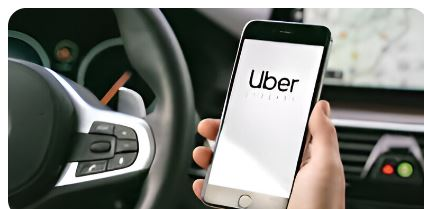


## Introduction to Uber ride Service

Uber offers a variety of ride options to suit different needs. You can request rides 24/7 through the Uber app, whether you need a quick trip across town, a ride to the airport, or even a rental car for a longer journey.

You can also use the Uber price estimator to get an idea of how much your ride will cost before you request it.
Group Rides, Easily set up a ride with friends and share the cost.


## Overview 

Analyzing, statistically evaluating, and visualizing Uber rides data can be incredibly beneficial for several reasons:

- Operational Efficiency: By examining patterns in ride data, Uber can optimize routes, reduce wait times, and improve overall service efficiency.
- Demand Forecasting: Statistical analysis helps predict peak times and locations for ride requests, allowing Uber to allocate resources more effectively.
- Customer Insights: Understanding rider behavior and preferences can lead to better-targeted promotions and improved customer satisfaction.
- Driver Performance: Data analysis can identify top-performing drivers and areas for improvement, leading to better training programs and incentives.
- Market Trends: Visualizing data helps in spotting trends and shifts in the market, enabling Uber to adapt its strategies accordingly.
- Safety Improvements: Analyzing incident reports and ride data can help identify safety issues and implement measures to enhance rider and driver safety.
- Revenue Optimization: By understanding fare patterns and ride frequencies, Uber can adjust pricing strategies to maximize revenue.
- Regulatory Compliance: Data analysis ensures that Uber complies with local regulations by providing necessary reports and insights.

## Data exploration

 - First, we will start off by loading and viewing the dataset, UberDataset.csv
 - Once our data are in good shape, we will do some exploratory data analysis to build our intuitions

 
## Data visualization tools
- Matplotlib and Seaborn, 
Python libraries that are excellent for creating static, animated, and interactive visualizations. Seaborn is built on top of Matplotlib and provides a high-level interface for drawing attractive statistical graphics. 


## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv(r"C:\Users\f3769593\OneDrive - FRG\Documents\0. Data Science\WorkplaceProject\DataSet\UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


Data Preprocessing section

In [ ]:
dataset['PURPOSE'].fillna("NOT", inplace=True)


In [34]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], 
                                       errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], 
                                     errors='coerce')

In [35]:
from datetime import datetime

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

#changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])

In [36]:
dataset.dropna(inplace=True)

In [37]:
dataset.drop_duplicates(inplace=True)

Data Visualizition section

In [38]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = dataset[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

Checking features which have null values in the new dataframe (if there are still any)

In [40]:
dataset.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
date          0
time          0
day-night     0
dtype: int64

Creating a HEATMAP

<Axes: >

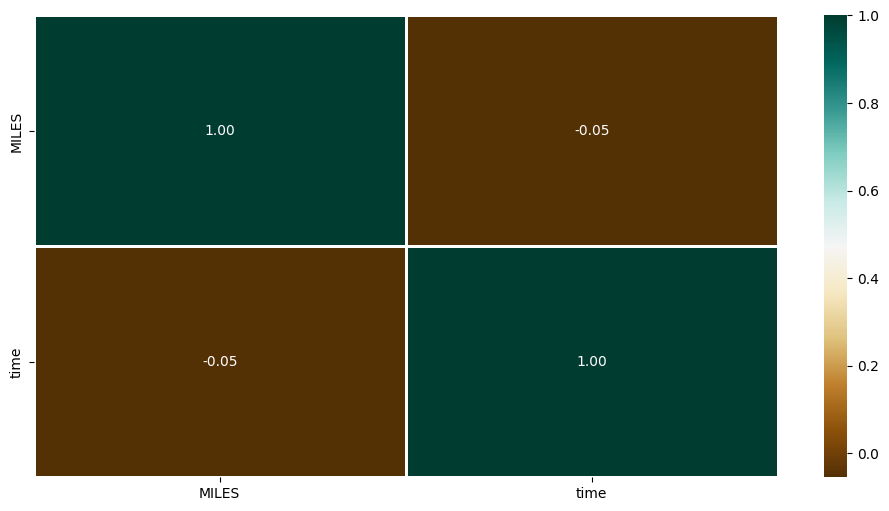

In [46]:
plt.figure(figsize=(12,6))

sns.heatmap(numeric_dataset.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)



In [ ]:
dataset.reset_index().plot(x='START', y='STOP',
                        figsize=(10,5), kind="bar")
plt.style.use('fivethirtyeight')
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))

plt.title('Sales Happening Per Hour (Spread Throughout The Week)',
          fontdict={'fontname': 'monospace', 'fontsize': 30}, y=1.05)

plt.ylabel("Number Of Purchases Made", fontsize=18, labelpad=20)
plt.xlabel("Hour", fontsize=18, labelpad=20)
plt.plot(months, MILES, color='m')
plt.grid()
plt.show()